In [1]:
import random

random.random()   # 0~1實數

0.7842102799840794

### 寫得有點亂, 有空重寫一個版本

In [1]:
import numpy as np
import random

class Cluster():
    def __init__(self, value, elements):
        self.value = value
        self.elements = elements


class KMeans():
    def __init__(self, k):
        """
        k: int, 群心、分群數目
        """
        self.k = k
        self.y_labels = []    # 標籤
        self.k_clusters = []    # 初始化結果, : Cluster
        
    def _init_cluster_central(self, x_train):
        """
        隨機分配群心，依據初始化model的k。
        """
        # 求得每一個特徵的最大最小值, 再搭配random取得random init
        features = []    # 儲存每一個特徵的最大最小值, (max, min)
        
        for j in range(len(x_train[0])):    # 特徵數, 取得每一個特徵的最大最小值
            min_ = float('inf')
            max_ = float('-inf')
            for k in range(len(x_train)):
                if x_train[k][j] > max_:
                    max_ = x_train[k][j]
                if x_train[k][j] < min_:
                    min_ = x_train[k][j]
            features.append((max_, min_))
        # print(features)
        
        for i in range(self.k):    # 初始化群心
            # print(features[i][0], features[i][1], random.random())
            value = []
            for j in range(len(x_train[0])):
                value.append((features[j][0]-features[j][1]) * random.random() + features[j][1])
            c = Cluster(value, [])
            self.k_clusters.append(c)   # 此時elements為空
    
    def _get_dist(self, x1, x2):
        """
        兩點間求距離
        """
        dist = 0
        
        for e1, e2 in zip(x1, x2):
            dist += (e1-e2)**2
        return dist**0.5
    
    def _converge(self, iteration, x_train):
        # 1. 更新群心
        # 2. 算dist, 重新分類, 重複1.
        # 這邊我用1000次去做結束, 應該有其他方法判斷是否收斂, 但我這邊簡單的用1000次iteration去做結束。
        for i in range(iteration):
            for j in range(len(self.k_clusters)):
                for k in range(len(x_train[0])):
                    # 這邊是計算加總該特徵的, 取平均
                    self.k_clusters[j].value[k] = 0
                    for e in self.k_clusters[j].elements:
                        self.k_clusters[j].value[k] += e[k]
                    if self.k_clusters[j].elements:
                        # 如果有分配到那邊才算
                        self.k_clusters[j].value[k] /= len(self.k_clusters[j].elements)
                # self.k_clusters[j].value = np.mean(self.k_clusters[j].elements)    # update 群心
                self.k_clusters[j].elements = []    # 更新完之後, 舊的elements需要重新分, 所以初始化***
        
            # 算dist
            # 因為更新, 之前的都洗掉
            self.y_labels = []
                
            # 算每一筆資料與群心的dist, 存入list
            for x in x_train:
                dist_list = []
                for i, cluster in enumerate(self.k_clusters):
                    dist_list.append((i, self._get_dist(x, cluster.value)))    # 儲存 index, dist, 之後用dist排序
                dist_list = sorted(dist_list, key=lambda element: element[1], reverse=False)
                self.y_labels.append(dist_list[0][0])    # 群心的index, 也可以直接作為分類           
                self.k_clusters[dist_list[0][0]].elements.append(x)    # 將資料分到該分類
    
    
    
    
    def fit_predict(self, x_train, iteration=20):
        """
        x_train: 1d-array, 需要貼標的資料。
        
        """
        
        # 初始化群心
        self._init_cluster_central(x_train)   
        
        # 算每一筆資料與群心的dist, 存入list
        for x in x_train:
            dist_list = []
            for i, cluster in enumerate(self.k_clusters):
                dist_list.append((i, self._get_dist(x, cluster.value)))    # 儲存 index, dist, 之後用dist排序
            # print(dist_list)  # 這邊沒問題
            dist_list = sorted(dist_list, key=lambda element: element[1], reverse=False)
            self.y_labels.append(dist_list[0][0])    # 群心的index, 也可以直接作為分類           
            self.k_clusters[dist_list[0][0]].elements.append(x)    # 將資料分到該分類
        
        # repeat until the clusters converge
        self._converge(iteration, x_train)
        
        return self.y_labels
        
                    
                
        
        

In [2]:
# 利用手寫辨識來試試, 可以知道應該為10群

from sklearn.datasets import load_digits

data = load_digits()
x = data['data']
y = data['target']

In [3]:
x.shape

(1797, 64)

In [4]:
y.shape

(1797,)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
x_train.shape

(1347, 64)

In [7]:
x_test.shape

(450, 64)

In [8]:
x_train[0]

array([ 0.,  1., 10., 15., 15.,  5.,  0.,  0.,  0., 11., 16.,  9., 12.,
       10.,  0.,  0.,  0., 15.,  6.,  0., 14.,  7.,  0.,  0.,  0.,  0.,
        0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,
        0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11.,
        8., 12., 14.,  1.,  0.,  1., 15., 16., 16., 12.,  5.,  0.])

In [12]:
# model build

kmeans = KMeans(k=10)
y_pred = kmeans.fit_predict(x_train)

In [17]:
print(len(y_train))
print(y_train)

1347
[2 1 3 ... 0 0 2]


2


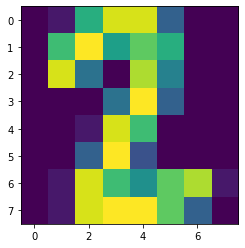

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0].reshape((8, 8)))
print(y_train[0])

In [18]:
print(len(y_pred))
print(y_pred)

1347
[5, 3, 1, 9, 8, 3, 3, 4, 6, 8, 8, 9, 0, 2, 5, 0, 3, 2, 1, 8, 7, 1, 5, 1, 4, 6, 9, 1, 4, 1, 4, 2, 2, 0, 3, 7, 3, 2, 3, 1, 8, 5, 0, 5, 7, 9, 0, 2, 4, 9, 0, 2, 0, 8, 2, 9, 5, 8, 0, 0, 5, 4, 8, 1, 1, 4, 1, 5, 1, 7, 4, 3, 1, 1, 7, 6, 3, 8, 5, 1, 4, 5, 1, 1, 1, 0, 1, 5, 5, 4, 0, 3, 4, 0, 0, 1, 3, 5, 8, 2, 5, 3, 1, 1, 6, 4, 1, 2, 0, 1, 2, 1, 5, 1, 4, 9, 1, 8, 8, 7, 2, 2, 3, 9, 0, 6, 1, 1, 8, 6, 1, 0, 3, 0, 4, 4, 6, 2, 8, 9, 6, 6, 7, 8, 8, 9, 7, 3, 1, 0, 1, 2, 2, 4, 7, 1, 1, 8, 0, 1, 5, 8, 7, 3, 1, 8, 7, 0, 1, 1, 1, 8, 5, 6, 4, 3, 6, 4, 6, 0, 9, 1, 0, 3, 9, 3, 1, 3, 5, 8, 8, 3, 2, 6, 8, 8, 6, 9, 5, 4, 8, 1, 2, 3, 2, 8, 3, 5, 5, 5, 3, 4, 9, 3, 1, 8, 1, 3, 3, 0, 9, 1, 4, 9, 2, 1, 4, 1, 0, 5, 0, 2, 0, 3, 9, 3, 1, 1, 9, 8, 5, 4, 5, 6, 4, 7, 0, 1, 4, 1, 3, 5, 5, 0, 3, 2, 1, 1, 3, 4, 3, 1, 1, 5, 3, 8, 4, 7, 6, 5, 3, 1, 1, 5, 1, 4, 8, 8, 3, 9, 5, 0, 2, 7, 1, 8, 1, 9, 8, 1, 1, 8, 2, 1, 0, 3, 9, 7, 2, 1, 7, 9, 1, 1, 9, 9, 3, 9, 0, 4, 8, 1, 1, 5, 9, 5, 8, 3, 3, 1, 2, 9, 5, 1, 1, 1, 5, 8, 1, 8, 7, 1

In [27]:
ones = []
for i, e in enumerate(y_pred):
    if e == 1:
        ones.append(i)

In [28]:
ones

[2,
 18,
 21,
 23,
 27,
 29,
 39,
 63,
 64,
 66,
 68,
 72,
 73,
 79,
 82,
 83,
 84,
 86,
 95,
 102,
 103,
 106,
 109,
 111,
 113,
 116,
 126,
 127,
 130,
 148,
 150,
 155,
 156,
 159,
 164,
 168,
 169,
 170,
 181,
 186,
 201,
 214,
 216,
 221,
 225,
 227,
 236,
 237,
 247,
 249,
 256,
 257,
 261,
 262,
 271,
 272,
 274,
 284,
 286,
 289,
 290,
 293,
 299,
 302,
 303,
 311,
 312,
 319,
 323,
 324,
 325,
 328,
 331,
 336,
 338,
 346,
 356,
 358,
 360,
 367,
 379,
 393,
 395,
 403,
 407,
 418,
 420,
 427,
 433,
 437,
 441,
 444,
 445,
 450,
 452,
 456,
 458,
 463,
 465,
 474,
 480,
 497,
 507,
 509,
 510,
 512,
 513,
 514,
 515,
 516,
 518,
 520,
 539,
 545,
 547,
 548,
 550,
 563,
 565,
 571,
 572,
 587,
 589,
 608,
 620,
 621,
 623,
 633,
 647,
 649,
 655,
 657,
 664,
 665,
 667,
 669,
 671,
 678,
 681,
 689,
 695,
 696,
 705,
 712,
 714,
 718,
 725,
 730,
 738,
 751,
 759,
 761,
 765,
 772,
 777,
 781,
 783,
 787,
 791,
 796,
 797,
 800,
 808,
 809,
 815,
 829,
 835,
 836,
 838,
 841,


3


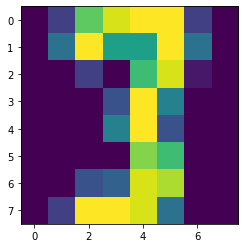

In [38]:
i = 103

plt.imshow((x_train[i].reshape(8, -1)))
print(y_train[i])

In [10]:
kmeans._get_dist([1, 2, 3], [10, 12, 13])

16.76305461424021